# Selected BSci Majors Subject Survey Visualisation – unrecommended subjects

In [1]:
## Import libraries


import pandas as pd
import numpy as np
from collections import defaultdict as dd
import re
import matplotlib.pyplot as plt

In [2]:
## Import data and preprocess data, also printing out its length


data = pd.read_csv('本科.csv')
print('Full Data:', len(data))

# Prepare projection (subset) of data from full dataset
DS = data[data['3.你的专业是'] == 'A.DS']
DS.index = range(len(DS))
print('DS:', len(DS))

CS = data[data['3.你的专业是'] == 'B.CS']
CS.index = range(len(CS))
print('CS:', len(CS))

Male = data[data['1.你的性别'] == 'A.男']
Male.index = range(len(Male))
print('Male:', len(Male))

Female = data[data['1.你的性别'] == 'B.女']
Female.index = range(len(Female))
print('Female:', len(Female))

Full Data: 19
DS: 6
CS: 11
Male: 8
Female: 11


### Central Control to generate appropriate graphs

In [3]:
# CHOICE = [data, '(DS/CS/MAST)', 'All']
CHOICE = [DS, '(DS)', 'DS']
# CHOICE = [CS, '(CS)', 'CS']
# CHOICE = [Male, '(Male)', 'Male']
# CHOICE = [Female, '(Female)', 'Female']

### Recommended Subjects

In [4]:
def collect_recommend(data):
    """ Helper function to tally up appearences of each recommended subject into a dictionary.
    Also creates a tally 'score' that is later unused (i.e. first choice recommend gets 3 votes) """
    
    recommend = dict()
    score = dict()
    
    for col in data.columns: # initialise the tally 
        if '00' in col: # select relevent columns only - cleverly uses feature of Unimelb subject code's XXXXn00nn structrure
            subject = col.split(':')[1].split()[0]

            recommend[subject] = 0
            score[subject] = 0


    for i in range(len(data)):
        if type(data['8.请按推荐程度给这三门必修课排序'][i]) == str:
            if '，' in data['8.请按推荐程度给这三门必修课排序'][i]: # seperates the subject codes
                votes = data['8.请按推荐程度给这三门必修课排序'][i].split('，')
            else:
                votes = data['8.请按推荐程度给这三门必修课排序'][i].split(' ')


            for i in range(len(votes)): # puts it into dictionary
                recommend[votes[i].strip()] += 1
                score[votes[i].strip()] += 3-i

    return recommend, score

### Not Recommended Switches

In [5]:
def collect_not_recommend(data, recommend):
    """ Collects the unrecommended subjects, splitting them into core/noncore """
    
    # Becuase unrecommended incorporated both BSci and Breadth, and the author only wanted BSci subjects,
    # BSCI subject code shorthands were hardcoded in
    BSCI = ['COMP', 'INFO', 'MAST', 'PHYC', 'ENGR']

    not_rec_core = dict()
    not_rec_noncore = dict()
    
    # Initialise
    for subject in recommend.keys():
        not_rec_core[subject] = 0

    extract = list()
    
    # extract the course codes using regex
    for i in range(len(data)):
        tmp = re.findall(r'[A-Z]{4}\d{5}', data['21.直至目前的学习中，请写出两个最踩雷的课程并对他们进行排序'][i])

        for item in tmp:
            extract.append(item)
    
    # add the observations into the two tallies according to core/noncore status
    for subject in extract:
        if subject in not_rec_core:
            not_rec_core[subject] += 1

        elif subject[0:4] in BSCI:
            if subject in not_rec_noncore:
                not_rec_noncore[subject] += 1

            else:
                not_rec_noncore[subject] = 1

    return not_rec_core, not_rec_noncore

### Main

In [6]:
# Process data for recommended Subjects
recommend, score = collect_recommend(CHOICE[0])

In [7]:
# Process data for unrecommended Subjects
not_rec_core, not_rec_noncore = collect_not_recommend(CHOICE[0], recommend)

In [8]:
# collates tally of 'recommend' for each of the subjects that appear in 'not recommend' - for final graph

rec_compare = dict()
for key in not_rec_core:
    if not_rec_core[key]:
        rec_compare[key] = recommend[key]

In [9]:
# Prepares data for graph 1 (want the bars to be from highest to lowest, so sorted them in reverse)
not_rec_core = list(not_rec_core.items())
not_rec_core = sorted(not_rec_core, key = lambda x:x[1], reverse = True)

In [10]:
## Graph 1

# Prepares data used for both Graph 1 and Graph 2 (Unrecommended Core)
labels = [x[0] for x in not_rec_core if x[1]]
values = [x[1] for x in not_rec_core if x[1]]

if CHOICE[1] in ['(DS/CS/MAST)']:

    plt.bar(x = labels, height = values, color = ['#B3CDE3' for i in range(10)]);
    plt.title(f'Unrecommended Core Subjects {CHOICE[1]}');
    plt.xlabel('Subject Code')
    plt.ylabel('Number of votes')
    plt.xticks(range(len(labels)), labels, rotation = 60);
    plt.yticks(range(max(values)+1), range(max(values)+1));
    plt.subplots_adjust(bottom=0.5)
    plt.savefig(f'Unrecommended Core {CHOICE[2]} - bar.png')

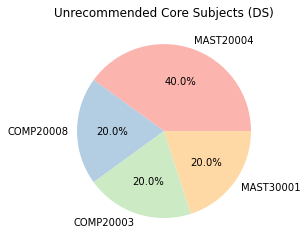

In [11]:
## Graph 2

if CHOICE[1] in ['(DS/CS/MAST)', '(Female)', '(DS)', '(CS)']:
    plt.title(f'Unrecommended Core Subjects {CHOICE[1]}');
    plt.pie(values, labels = labels, autopct='%1.1f%%', colors = ['#FBB4AE' if i%4 == 0 else '#B3CDE3' if i%4 == 1 else '#CCEBC5' if i%4 == 2 else '#FED9A6' for i in range(len(values))]);
    plt.savefig(f'Unrecommended Core {CHOICE[2]} - pie.png')

In [12]:
# Prepares data for graph 3 and graph 4
not_rec_noncore = list(not_rec_noncore.items())
not_rec_noncore = sorted(not_rec_noncore, key = lambda x:x[1], reverse = True)

In [13]:
## Graph 3

# Prepares data used for both Graph 3 and Graph 4 (Unrecommended Noncore)
labels = [x[0] for x in not_rec_noncore if x[1]]
values = [x[1] for x in not_rec_noncore if x[1]]

if CHOICE[1] in ['(DS/CS/MAST)']:

    plt.bar(x = labels, height = values, color = ['#B3CDE3' for i in range(10)]);
    plt.xticks(range(len(labels)), labels, rotation = 60);
    plt.yticks(range(max(values)+1), range(max(values)+1));
    plt.title(f'Unrecommended Elective Subjects {CHOICE[1]}');
    plt.xlabel('Subject Code')
    plt.ylabel('Number of votes')
    plt.subplots_adjust(bottom=0.5)
    plt.savefig(f'Unrecommended Elective {CHOICE[2]} - bar.png')

In [14]:
## Graph 4

if CHOICE[1] in ['(DS/CS/MAST)', '(CS)']:
    plt.title(f'Unrecommended Elective Subjects {CHOICE[1]}');
    plt.pie(values, labels = labels, autopct='%1.1f%%', colors = ['#FBB4AE' if i%4 == 0 else '#B3CDE3' if i%4 == 1 else '#CCEBC5' if i%4 == 2 else '#FED9A6' for i in range(len(values))]);
    plt.savefig(f'Unrecommended Elective {CHOICE[2]} - pie.png')

In [15]:
# Create combined dataset for graph 5 and 6
combined = {}
for key, value in not_rec_core:
    combined[key] = value
for key, value in not_rec_noncore:
    combined[key] = value

combined = list(combined.items())
combined = sorted(combined, key = lambda x:x[1], reverse = True)

In [17]:
# Prepare data for graph 5 and 6

labels = [x[0] for x in combined if x[1]]
values = [x[1] for x in combined if x[1]]

## Graph 5
if CHOICE[1] in ['(DS/CS/MAST)']:

    plt.bar(x = labels, height = values, color = ['#B3CDE3','#B3CDE3','#B3CDE3', '#FBB4AE','#B3CDE3','#FBB4AE',
                                                   '#B3CDE3','#B3CDE3','#B3CDE3','#B3CDE3','#B3CDE3','#B3CDE3',
                                                  '#FBB4AE','#FBB4AE','#FBB4AE','#FBB4AE','#FBB4AE','#FBB4AE',
                                                   '#FBB4AE','#FBB4AE']);
    plt.xticks(range(len(labels)), labels, rotation = 90);
    plt.yticks(range(max(values)+1), range(max(values)+1));
    plt.title(f'Unrecommended BSci Subjects {CHOICE[1]}');
    plt.xlabel('Subject Code')
    plt.ylabel('Number of votes')
    plt.subplots_adjust(bottom=0.5)
    # 把noncore变红色
    plt.savefig(f'Unrecommended BSci Subjects {CHOICE[2]} - bar.png')

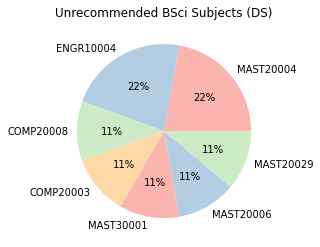

In [18]:
## Graph 6
if CHOICE[1] in ['(DS/CS/MAST)', '(Male)', '(Female)', '(DS)', '(CS)']:
    plt.title(f'Unrecommended BSci Subjects {CHOICE[1]}');
    plt.pie(values, labels = labels, autopct='%1.0f%%', colors = ['#FBB4AE' if i%4 == 0 else '#B3CDE3' if i%4 == 1 else '#CCEBC5' if i%4 == 2 else '#FED9A6' for i in range(len(values))]);
    plt.savefig(f'Unrecommended BSci Subjects {CHOICE[2]} - pie.png')

In [19]:
# Prepare Data for Graph 7
labels = [x[0] for x in not_rec_core if x[1]]
not_rec = [x[1] for x in not_rec_core if x[1]]

In [20]:
rec = [rec_compare[x] for x in labels]

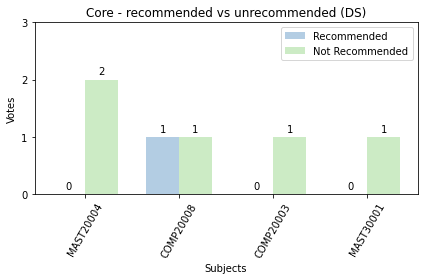

In [21]:
## Graph 7
x = np.arange(len(labels))  # the label locations
width = 0.35  # the width of the bars

fig, ax = plt.subplots()
rects1 = ax.bar(x - width/2, rec, width, label='Recommended', color = ['#B3CDE3' for i in range(10)])
rects2 = ax.bar(x + width/2, not_rec, width, label='Not Recommended', color = ['#CCEBC5' for i in range(10)])

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('Votes')
ax.set_xlabel('Subjects')
ax.set_title('')
plt.xticks(x, labels, rotation = 60);
plt.yticks(range(max([max(rec), max(not_rec)])+2))
ax.legend()

ax.bar_label(rects1, padding=3)
ax.bar_label(rects2, padding=3)
plt.title(f'Core - recommended vs unrecommended {CHOICE[1]}')
plt.subplots_adjust(bottom=0.15)
fig.tight_layout()

plt.savefig(f'{CHOICE[2]} - recommend vs unrecommend')